<a href="https://colab.research.google.com/github/hatchdavid1/tensorflow_notes_tests/blob/main/Fashion_mnist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Hello World, a Computer Vision Example
 In the previous exercise you saw how to create a neural network that figured out the problem we're trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function Y = 2x-1 directly, instead of bothering with using Machine Learning to learn the relationship between X and Y for a fixed set of values, and extending that for all values. 

 But what about a scenario where writting rules that is much more difficult -- for example a computer vision problem ? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types

# Start Coding 
Let's start with out import of Tensorflow

In [1]:
import tensorflow as tf 
print(tf.__version__)

2.5.0


In [2]:
# Fashion MNIST data is available directly in the tf.keras dataset API. You load data like this:
mnist = tf.keras.datasets.fashion_mnist
# Calling load_data on this object will give you two sets of two list, these will be the training and testing values of the graphics that contain the clothing items and their labels
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 23

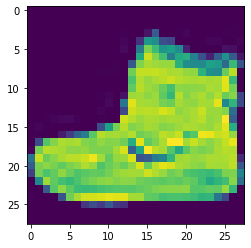

In [3]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0], '\n', training_images[0])

You will notice that all of the values in the number are between 0 1n 255. If we are training neural networl, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'noramlizing' and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [4]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why there are 2 sets.. training abd testing -- remember we spoke about this in the intro ? 
The idea is to have 1 set of data for training, and then another set of data... that the model hasn't yet seen... to see how good it would be at classifying values. After all, when you're donde, you're going to want to try it out with data that it hadn't previously seen. 
Let's now design the model. There's quite a few new concepts here, but don't worry, you will get the hang on them. 

In [7]:
# Sequential model with specific layers
model  = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                   tf.keras.layers.Dense(128, activation = tf.nn.relu), 
                                   tf.keras.layers.Dense(10, activation= tf.nn.softmax)])

**Sequential** : That defines a Sequence of layers in the neural network

**Flatten** : Rememeber earlier where our images where a square, when you printed them out ? Flatten just takes that square and turns into a 1 dimensional set. 

**Dense** : Adds layers of neurons

Each layer of neurons need and **activation function** to tell them what to do. There's a lots of options, but just use these for now. 

**Relu** : efectively means 'if X>0, else retunr 0' -- so what it does it only passes values 0 or greater to the next layer in the network 

**Softmax** : takes a set of values, and effectively picks the biggest one, so for example, if the output of the layers looks like [.1,.1,.05,.1,9.05,.1,.05], it saves you from fishing through it looking for the biggest value, and turns into [0,0,0,0,1,0,0,0] -- The goal is to save a lot of coding 

The next thing to do, now the model is defined, is to acctually build it. Ypu do this by compiling it with an optimizer and loss function as before -- and then you train it by calling model.fit asking it to fit your training data to your training labels -- i.e. have it figure out the relationshipp between the triaing data and its actual labels, so in the future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [10]:
# Compiling model with an Optimizer 
model.compile(optimizer= 'Adam', # in case it's an older version = tf.train.AdamOptimizer() | tf.train.Adam()
              loss = 'sparse_categorical_crossentropy', 
              metrics= ['accuracy'])

# Fitting model 
model.fit(training_images, training_labels, epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4969 - accuracy: 0.8246
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8647
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8771
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3119 - accuracy: 0.8856
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8903
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.8956
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.8996


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like .9098. This tells you that your nerural network is abiut 91% accurate in classifying the training the data. I.E. if figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly. 

But how would it work with the unseen data? That's why we have the test images. We can call mdeol.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try: 

In [11]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3479 - accuracy: 0.8757


[0.3479054570198059, 0.8756999969482422]

# Exploration Exercises 

 # Exercise 1: 

 For this first exercise  run the below code: It creates a set of classification for each of the test images, and then prints the first entry in the classification. The output, after you run it is a list of numbers. Why do you think  this is, and what do those numbers represent ? 

In [12]:
classifications = model.predict(test_images)
print(classifications[0])

[9.0112508e-06 3.0635561e-10 9.4763770e-08 4.8927268e-11 3.7606062e-06
 1.2743649e-02 4.4110579e-06 2.1113729e-02 7.4953532e-06 9.6611786e-01]


In [13]:
# Hint try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does ? 
print(test_labels[0])

9


**What does this list represent ?** 
1.- It's a 10 random meaningless values 
2.- It's the first 10 classification that the computer made 
3.- It's the probability that this item is each of the 10 classes 

 **Answer** 
 The correct answer is 3
 The ouput of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the correspodning value, i.e. the fist value in the list is the probability that the handwriting is of a 0 the next is 1 etc. Notice that they are all very low probablities. 
 For the 7, the probabity was .999 i.e. the neural network is telling us that it's almost certainly a 7. 

**How dou you know that this list tells you that the item is an ankle boot?**

1.- There's not enough information to answer that question
2.- the 10th element on the list is the biggest, and the ankle boot is labelled 9 
3.- The ankle boot is label 9, and there are 0->0 elements on the list 

**Answer** 
The correct answer is 2. Both the list and the labels are 0 bases, so the ankle boot having label 9 means that it is the 10th of the 10 classes. the list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is mostly likely an ankel boot
 
# Excercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc ? Why do you think that's the case ? 

In [3]:
######## Note to run next code lines restart kernel so don't train two times the model, or just change varaible names
import tensorflow as tf
mnist = tf.keras.datasets.mnist
#Loading data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# Normalizing data
training_images = training_images / 255.0
test_imamges = test_images / 255.0
# Building model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [5]:
# Optimizing and compiling model 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')
# Fitting model 
model.fit(training_images, training_labels, epochs=5)
#Evaluatig model
model.evaluate(test_images, test_labels)
# Predict and classify
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1833
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0741
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0473
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0358
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 13.9409
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


# Question 1. Increasing to 1024 Neurons -- What the impact? 
1.- Training takes longer, but is more accurate
2.- Training takes longer, but no impact on accuracy
3.- Training takes the same time, but is more accurate 

**Answer** 
The correct answer is 1 by adding more neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of dimishing returns very quickly. 

# Exercise 3: 
What would happen if you remove the Flatten() layer. Why do you think that's the case ? 

You can get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumg that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writing all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0
###### Without the Flatten layer it won't run because there's an error on the number of values needed
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0], '\n', test_labels[0])


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1485
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1075
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0857
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0861
[3.3445829e-07 1.5682316e-08 4.3923164e-06 4.3433727e-04 3.9768708e-10
 1.1291047e-06 7.4427894e-11 9.9953043e-01 7.0359383e-06 2.2248556e-05] 
 7
